# I already Provide the UCI HAR Dataset.zip with my code, All u need to do is directly upload the zip and check the Path

# Import Necessary file 

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns


# Extracting the data + Load The Data

In [2]:
def load_data():
    # Extract zip file
    with zipfile.ZipFile('UCI HAR Dataset.zip', 'r') as zip_ref:
        zip_ref.extractall('.')
    
    # Load the data
    features = pd.read_csv('UCI HAR Dataset/features.txt', delim_whitespace=True, header=None)
    activity_labels = pd.read_csv('UCI HAR Dataset/activity_labels.txt', delim_whitespace=True, header=None)
    X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
    y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, header=None)
    X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
    y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', delim_whitespace=True, header=None)
    
    return X_train, y_train, X_test, y_test




# Check for missing values in training and test data

In [3]:
# Load the data
X_train, y_train, X_test, y_test = load_data()

# Check for missing values in training and test data
print("Missing values in training data:", X_train.isnull().sum().sum())
print("Missing values in test data:", X_test.isnull().sum().sum())

Missing values in training data: 0
Missing values in test data: 0


# Visualize Missing Values in Graph

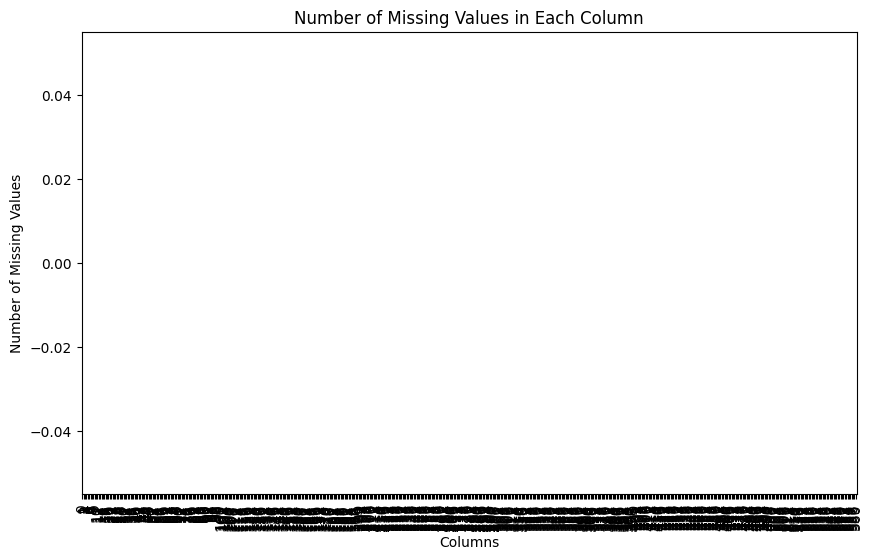

In [4]:

data = pd.concat([X_train, X_test])

# Calculate the number of missing values in each column
missing_values = data.isnull().sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, color='blue')
plt.title('Number of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()


# Function to preprocess data

In [5]:
def preprocess_data(X_train, X_test):
    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Apply PCA
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    return X_train_pca, X_test_pca


# Function to evaluate models

In [6]:
def evaluate_models(X_train, X_test, labels_kmeans_train, labels_kmeans_test, labels_dbscan_train, labels_dbscan_test):
    # Calculate silhouette scores
    score_kmeans_train = silhouette_score(X_train, labels_kmeans_train)
    score_kmeans_test = silhouette_score(X_test, labels_kmeans_test)
    score_dbscan_train = silhouette_score(X_train, labels_dbscan_train)
    score_dbscan_test = silhouette_score(X_test, labels_dbscan_test)
    
    print(f"Silhouette Score for K-Means (Train): {score_kmeans_train}")
    print(f"Silhouette Score for K-Means (Test): {score_kmeans_test}")
    print(f"Silhouette Score for DBSCAN (Train): {score_dbscan_train}")
    print(f"Silhouette Score for DBSCAN (Test): {score_dbscan_test}")
    
    


# Function to visualize clusters

In [7]:
def visualize_clusters(X_train, X_test, labels_kmeans_train, labels_kmeans_test, labels_dbscan_train, labels_dbscan_test):
    # K-Means (Train)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=labels_kmeans_train, s=50, cmap='viridis')
    plt.title('K-Means Clustering (Train)')
    plt.show()

    # K-Means (Test)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_kmeans_test, s=50, cmap='viridis')
    plt.title('K-Means Clustering (Test)')
    plt.show()

    # DBSCAN (Train)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=labels_dbscan_train, s=50, cmap='viridis')
    plt.title('DBSCAN Clustering (Train)')
    plt.show()

    # DBSCAN (Test)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_dbscan_test, s=50, cmap='viridis')
    plt.title('DBSCAN Clustering (Test)')
    plt.show()


# Applying Cluster

In [8]:
def apply_clustering(X_train, X_test):
    # K-Means
    kmeans = KMeans(n_clusters=6)
    kmeans.fit(X_train)
    labels_kmeans_train = kmeans.predict(X_train)
    labels_kmeans_test = kmeans.predict(X_test)
    
    # DBSCAN
    dbscan = DBSCAN(eps=0.3, min_samples=5)
    dbscan.fit(X_train)
    labels_dbscan_train = dbscan.labels_
    labels_dbscan_test = dbscan.fit_predict(X_test)
    
    return labels_kmeans_train, labels_kmeans_test, labels_dbscan_train, labels_dbscan_test

# Main Function to run the code

Silhouette Score for K-Means (Train): 0.4737153733485162
Silhouette Score for K-Means (Test): 0.4576772603681606
Silhouette Score for DBSCAN (Train): -0.3642397206179634
Silhouette Score for DBSCAN (Test): -0.46932698767821696


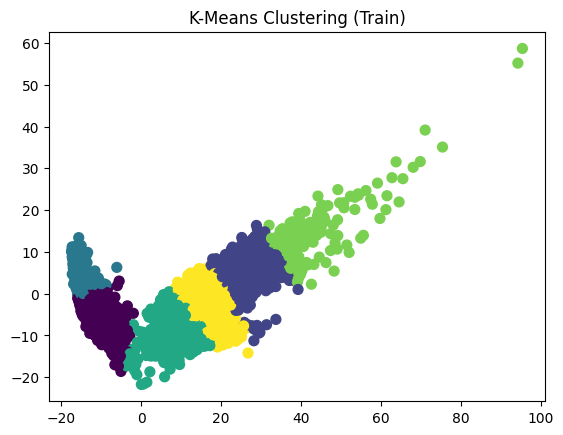

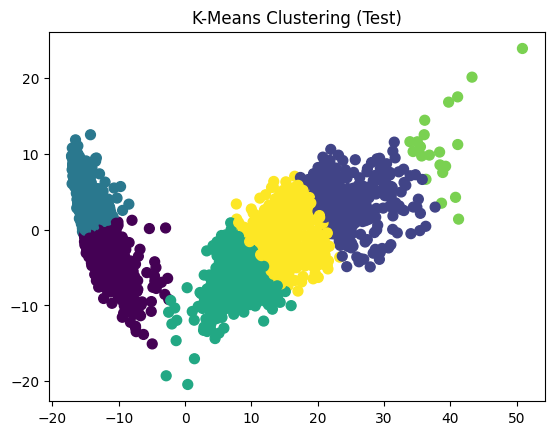

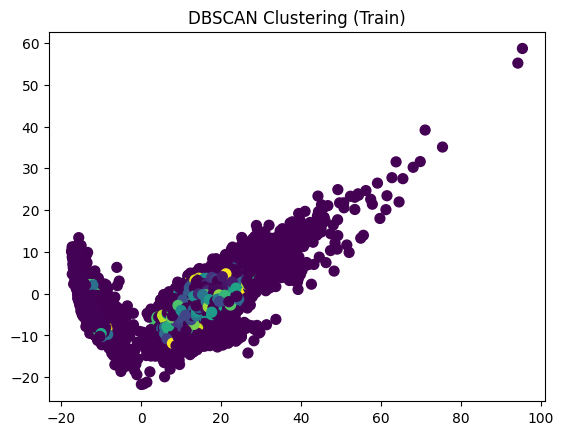

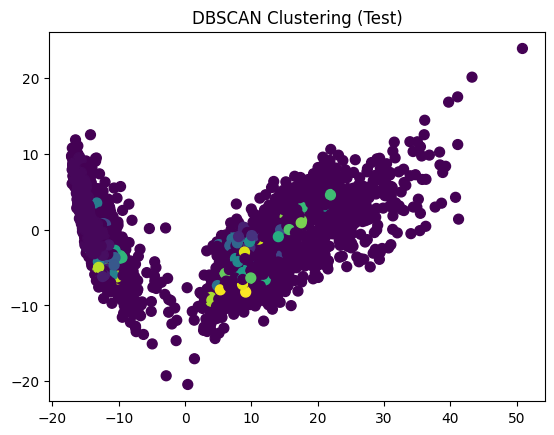

In [9]:

def main():
    X_train, y_train, X_test, y_test = load_data()
    X_train_pca, X_test_pca = preprocess_data(X_train, X_test)
    labels_kmeans_train, labels_kmeans_test, labels_dbscan_train, labels_dbscan_test = apply_clustering(X_train_pca, X_test_pca)
    evaluate_models(X_train_pca, X_test_pca, labels_kmeans_train, labels_kmeans_test, labels_dbscan_train, labels_dbscan_test)
    visualize_clusters(X_train_pca, X_test_pca, labels_kmeans_train, labels_kmeans_test, labels_dbscan_train, labels_dbscan_test)

# Run the main function
if __name__ == "__main__":
    main()


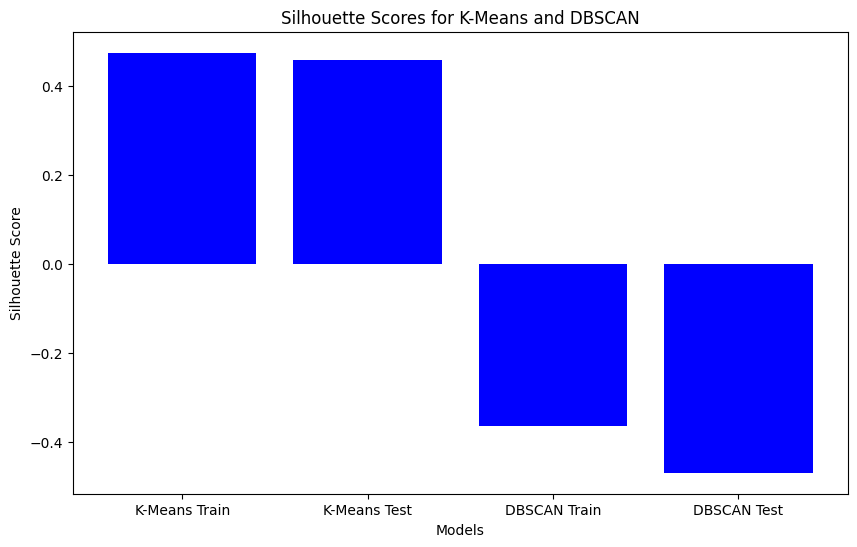

In [10]:
import matplotlib.pyplot as plt

# Define the silhouette scores
scores = {
    'K-Means Train': 0.47369025280998933,
    'K-Means Test': 0.4576405958471028,
    'DBSCAN Train': -0.36423972644203984,
    'DBSCAN Test': -0.4693269858929752
}

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(scores.keys(), scores.values(), color='blue')
plt.title('Silhouette Scores for K-Means and DBSCAN')
plt.xlabel('Models')
plt.ylabel('Silhouette Score')
plt.show()
